In [1]:
import pandas as pd
import glob, os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
path = 'crime_final_clean10_17.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
0,1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7.0,8,Tuesday,Sep,1914
1,1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3.0,2,Monday,Nov,1914
2,1914-12-03,12D20,12800-12899,GULF,Auto Theft,No label,1.0,19.0,3,Thursday,Dec,1914
3,1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1.0,NaN,5,Tuesday,Jan,1915
4,1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1.0,NaN,14,Thursday,Jan,1915


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date').sort_index(ascending=True)

In [6]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7.0,8,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3.0,2,Monday,Nov,1914
1914-12-03,12D20,12800-12899,GULF,Auto Theft,No label,1.0,19.0,3,Thursday,Dec,1914
1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1.0,NaN,5,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1.0,NaN,14,Thursday,Jan,1915


In [7]:
ds = df.loc['2010':'2017']

In [9]:
ds.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,15E30,4200-4299,WILLOWBEND,Theft,FIELD/WOODS,1.0,NaN,1,Friday,Jan,2010
2010-01-01,6B20,3700-3799,PINEMONT,Rape,APARTMENT,1.0,NaN,1,Friday,Jan,2010
2010-01-01,4F20,2900-2999,GESSNER,Theft,APARTMENT,1.0,NaN,1,Friday,Jan,2010
2010-01-01,20G30,3400-3499,WALNUT BEND,Theft,APARTMENT,1.0,NaN,1,Friday,Jan,2010
2010-01-01,17E30,9700-9799,GESSNER,Burglary,APARTMENT,1.0,NaN,1,Friday,Jan,2010


# groupby

In [18]:
yr = df.loc['2017':]

In [19]:
yr.groupby(['month'])['OffenseType'].sum()

month
Apr    TheftTheftTheftTheftAggravated AssaultTheftAut...
Aug    Auto TheftTheftTheftTheftBurglaryTheftTheftBur...
Dec    Aggravated AssaultTheftBurglaryAuto TheftTheft...
Feb    TheftBurglaryTheftRobberyAggravated AssaultThe...
Jan    TheftTheftTheftRobberyTheftTheftTheftTheftRobb...
Jul    TheftAuto TheftTheftAuto TheftTheftBurglaryThe...
Jun    TheftTheftTheftBurglaryTheftTheftTheftAuto The...
Mar    TheftRobberyTheftTheftTheftAuto TheftAggravate...
May    TheftTheftTheftRobberyTheftTheftTheftAuto Thef...
Nov    RobberyRobberyRobberyAuto TheftTheftTheftBurgl...
Oct    TheftBurglaryAuto TheftTheftRapeRapeRobberyBur...
Sep    BurglaryBurglaryAggravated AssaultTheftBurglar...
Name: OffenseType, dtype: object

In [28]:
yr.groupby(['weekday']).agg({'OffenseType':'max'})

,OffenseType
weekday,
Friday,Theft
Monday,Theft
Saturday,Theft
Sunday,Theft
Thursday,Theft
Tuesday,Theft
Wednesday,UNK


In [45]:
testy = yr.groupby(['month']).agg({'OffenseType':['min','max','count'],
                           })

In [65]:
yr.columns

Index(['Beat', 'BlockRange', 'StreetName', 'OffenseType', 'Premise',
       'NumOffenses', 'Hour', 'day', 'weekday', 'month', 'year'],
      dtype='object')

In [99]:
yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2017-01-01,15E40,10000-10099,FANNIN,Theft,Apartment Parking Lot,1.0,NaN,1,Sunday,Jan,2017
2017-01-01,15E10,6500-6599,WANDA,Theft,Apartment,1.0,NaN,1,Sunday,Jan,2017
2017-01-01,15E20,11900-11999,CHIMNEY ROCK,Theft,"Road, Street, or Sidewalk",1.0,NaN,1,Sunday,Jan,2017
2017-01-01,15E40,2600-2699,WESTRIDGE,Robbery,Apartment Parking Lot,1.0,NaN,1,Sunday,Jan,2017
2017-01-01,UNK,5200-5299,FIDELITY,Theft,Miscellaneous Business (Non-Specific),1.0,NaN,1,Sunday,Jan,2017


In [98]:
yr.groupby(['month']).sum()

,NumOffenses,Hour,day,year
month,,,,
Apr,9678.0,0.0,144911,19105042
Aug,10268.0,0.0,149133,20280935
Dec,10089.0,0.0,155209,19931996
Feb,9874.0,0.0,135762,19516492
Jan,10698.0,0.0,170490,21073620
Jul,10660.0,0.0,170565,21073616
Jun,10532.0,0.0,159941,20841661
Mar,10014.0,0.0,160599,19782736
May,10765.0,0.0,167922,21196665


In [101]:
yr.groupby('month').get_group('May')

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2017-05-01,14D50,4600-4699,S SAM HOUSTON PKWY E,Theft,Commercial Parking Lot or Garage,1.0,NaN,1,Monday,May,2017
2017-05-01,8C10,9500-9599,CROFTON ST,Theft,Apartment,1.0,NaN,1,Monday,May,2017
2017-05-01,6B60,3100-3199,LITTLE BEAR,Theft,Commercial Parking Lot or Garage,1.0,NaN,1,Monday,May,2017
2017-05-01,6B60,500-599,GREENS RD,Robbery,Apartment,1.0,NaN,1,Monday,May,2017
2017-05-01,3B50,4400-4499,NORTH,Theft,Grocery Store or Supermarket,1.0,NaN,1,Monday,May,2017
2017-05-01,6B60,300-399,BENMAR DR,Theft,Apartment Parking Lot,1.0,NaN,1,Monday,May,2017
2017-05-01,3B50,5800-5899,DASHWOOD 33,Theft,Miscellaneous Business (Non-Specific),1.0,NaN,1,Monday,May,2017
2017-05-01,5F40,22300-22399,GRAND CORNER DR.,Auto Theft,Hospital Parking Lot,1.0,NaN,1,Monday,May,2017
2017-05-01,3B50,17400-17499,IMPERIAL VALLEY DRIVE A,Theft,Department or Discount Store,1.0,NaN,1,Monday,May,2017


In [104]:
yr.groupby(['month','weekday']).sum()

NumOffenses  Hour    day     year
month weekday                                     
Apr   Friday          1390.0   0.0  23749  2767326
      Monday          1299.0   0.0  17211  2549488
      Saturday        1640.0   0.0  23289  3233251
      Sunday          1377.0   0.0  20487  2708831
      Thursday        1367.0   0.0  22043  2684643
      Tuesday         1261.0   0.0  17946  2519233
      Wednesday       1344.0   0.0  20186  2642270
Aug   Friday          1418.0   0.0  18799  2783460
      Monday          1305.0   0.0  19817  2599913
      Saturday        1215.0   0.0  16992  2390145
      Sunday           976.0   0.0  13125  1920184
      Thursday        1843.0   0.0  29666  3614464
      Tuesday         1768.0   0.0  24542  3515631
      Wednesday       1743.0   0.0  26192  3457138
Dec   Friday          1737.0   0.0  25892  3443019
      Monday          1348.0   0.0  16984  2690678
      Saturday        1513.0   0.0  23841  2971041
      Sunday          1307.0   0.0  21204  2565624
      Thursday        1435.0   0.0  24864  2823800
      Tuesday         1412.0   0.0  21084  2795562
      Wednesday       1337.0   0.0  21340  2642272
Feb   Friday          1486.0   0.0  18708  2962973
      Monday          1423.0   0.0  22450  2821783
      Saturday        1493.0   0.0  20037  2934735
      Sunday          1396.0   0.0  20153  2724967
      Thursday        1406.0   0.0  16836  2789511
      Tuesday         1298.0   0.0  22372  2581760
      Wednesday       1372.0   0.0  15206  2700763
Jan   Friday          1551.0   0.0  25675  3065840
      Monday          1746.0   0.0  28171  3426883
...                      ...   ...    ...      ...
Mar   Tuesday         1251.0   0.0  21336  2490995
      Wednesday       1553.0   0.0  23245  3073908
May   Friday          1453.0   0.0  22429  2858089
      Monday          1855.0   0.0  26355  3642702
      Saturday        1237.0   0.0  19430  2430497
      Sunday          1149.0   0.0  19957  2259040
      Thursday        1446.0   0.0  20947  2878259
      Tuesday         1855.0   0.0  29666  3642702
      Wednesday       1770.0   0.0  29138  3485376
Nov   Friday          1251.0   0.0  16483  2478893
      Monday          1581.0   0.0  25404  3118282
      Saturday        1250.0   0.0  17745  2470825
      Sunday          1144.0   0.0  17406  2255006
      Thursday        1592.0   0.0  23301  3146520
      Tuesday         1330.0   0.0  22743  2640253
      Wednesday       1676.0   0.0  25122  3330067
Oct   Friday          1282.0   0.0  21345  2551505
      Monday          1750.0   0.0  27620  3457138
      Saturday        1212.0   0.0  20832  2406281
      Sunday          1432.0   0.0  20855  2821786
      Thursday        1342.0   0.0  20106  2624117
      Tuesday         1587.0   0.0  27137  3142486
      Wednesday       1343.0   0.0  19110  2640253
Sep   Friday          1447.0   0.0  22217  2878259
      Monday          1204.0   0.0  17603  2378043
      Saturday        1401.0   0.0  22795  2720933
      Sunday          1064.0   0.0  14348  2083561
      Thursday        1198.0   0.0  21224  2367958
      Tuesday         1227.0   0.0  19019  2456706
      Wednesday       1218.0   0.0  19878  2418383

[84 rows x 4 columns]

In [109]:
mnth = yr.groupby('month')
mnth.aggregate(np.sum)

,NumOffenses,Hour,day,year
month,,,,
Apr,9678.0,0.0,144911,19105042
Aug,10268.0,0.0,149133,20280935
Dec,10089.0,0.0,155209,19931996
Feb,9874.0,0.0,135762,19516492
Jan,10698.0,0.0,170490,21073620
Jul,10660.0,0.0,170565,21073616
Jun,10532.0,0.0,159941,20841661
Mar,10014.0,0.0,160599,19782736
May,10765.0,0.0,167922,21196665


In [120]:
grouped = yr.groupby('month')
grouped['year'].agg([np.sum, np.mean, np.std])

,sum,mean,std
month,,,
Apr,19105042,2017.001900,0.165676
Aug,20280935,2017.000000,0.000000
Dec,19931996,2017.000202,0.020119
Feb,19516492,2017.000000,0.000000
Jan,21073620,2017.000383,0.039133
Jul,21073616,2017.000000,0.000000
Jun,20841661,2017.000000,0.000000
Mar,19782736,2017.000000,0.000000
May,21196665,2017.001142,0.117058


In [137]:
yr.groupby(['OffenseType']).agg({'OffenseType':'count'})

,OffenseType
OffenseType,
Aggravated Assault,12265
Auto Theft,11388
Burglary,16912
Murder,246
Rape,1224
Robbery,9753
Theft,66798
UNK,1


In [130]:
yr.groupby(['OffenseType'])[['weekday']].sum()

,weekday
OffenseType,
Aggravated Assault,SundaySundaySundaySundaySundaySundaySundaySund...
Auto Theft,SundaySundaySundaySundaySundaySundaySundaySund...
Burglary,SundaySundaySundaySundaySundaySundaySundaySund...
Murder,SundayTuesdayTuesdayWednesdayWednesdaySundayWe...
Rape,SundaySundaySundaySundaySundaySundaySundayMond...
Robbery,SundaySundaySundaySundaySundaySundaySundaySund...
Theft,SundaySundaySundaySundaySundaySundaySundaySund...
UNK,Wednesday


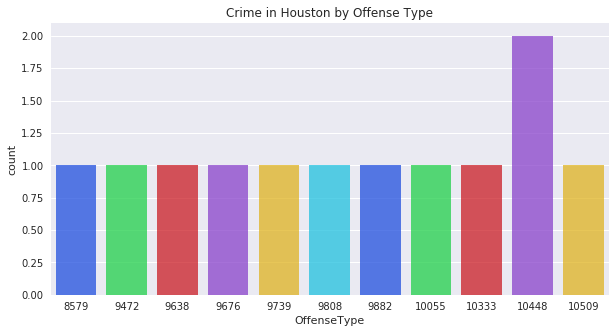

In [92]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="OffenseType",
              data=month,
              palette='bright',
              alpha=0.75)
ax.set_title('Crime in Houston by Offense Type');
